In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn.model_selection import train_test_split
df = pd.read_csv (r'PSM_DesMoines,IA_2016.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])

In [3]:

df.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Solar Zenith Angle,Wind Speed,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,0,-9,160.98,4.2,84.65,-7,980
1,2016,1,1,0,30,0,0,0,-9,161.24,3.9,84.65,-7,980
2,2016,1,1,1,0,0,0,0,-9,159.49,3.7,86.55,-8,980
3,2016,1,1,1,30,0,0,0,-9,156.17,3.8,86.55,-8,980
4,2016,1,1,2,0,0,0,0,-10,151.85,4.0,84.20,-8,980


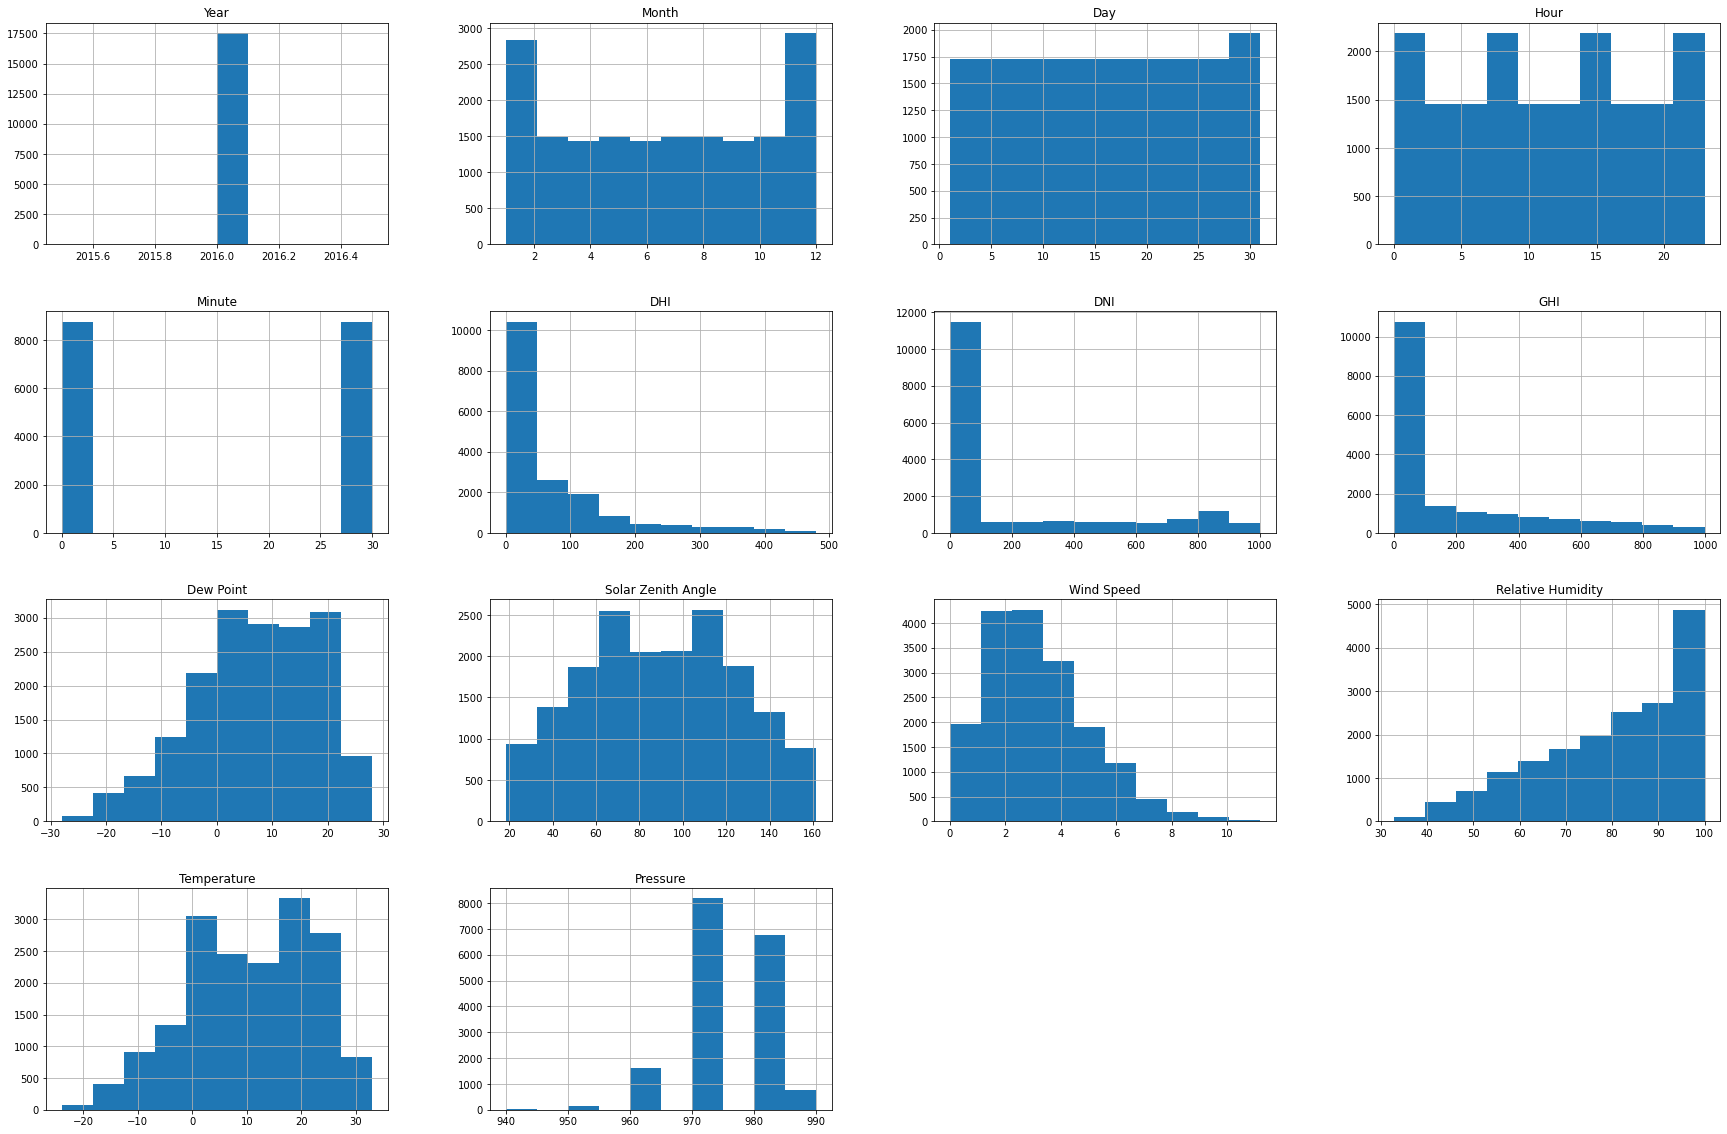

In [4]:
df.hist(figsize=(30,20))
plt.show()

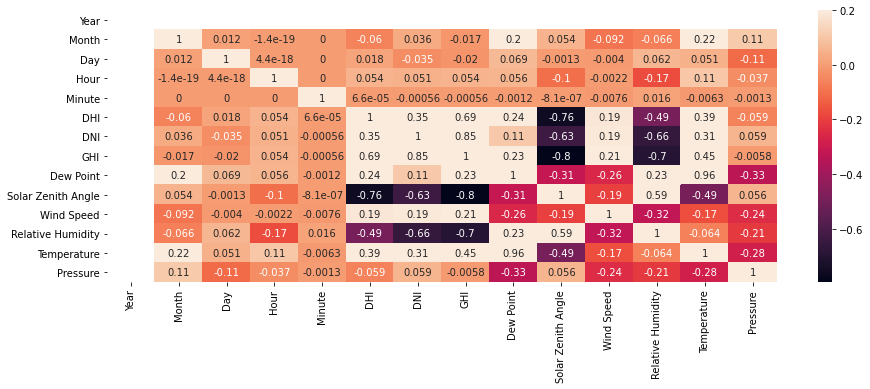

array([[1.        , 0.05875886],
       [0.05875886, 1.        ]])

In [16]:

corrmat = df.corr()
#plt.subplots()

plt.figure(figsize=(15, 5))
sns.heatmap(corrmat, vmax=0.2,annot=True)
plt.show()
np.corrcoef(df['DNI'], df['Pressure'])

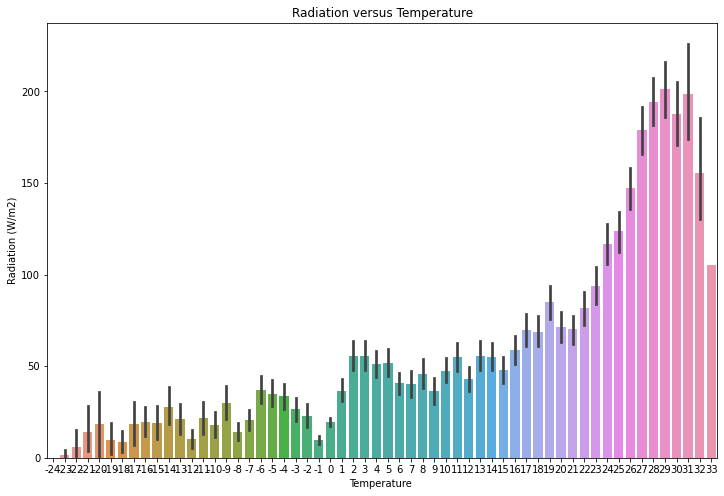

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(y=df['DHI'],x=df['Temperature'])
plt.xlabel('Temperature ')
plt.ylabel('Radiation (W/m2)')
plt.title('Radiation versus Temperature')
plt.show()

In [6]:
df.drop(df.index[0])
#df.head(0)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Solar Zenith Angle,Wind Speed,Relative Humidity,Temperature,Pressure
1,2016,1,1,0,30,0,0,0,-9,161.24,3.9,84.65,-7,980
2,2016,1,1,1,0,0,0,0,-9,159.49,3.7,86.55,-8,980
3,2016,1,1,1,30,0,0,0,-9,156.17,3.8,86.55,-8,980
4,2016,1,1,2,0,0,0,0,-10,151.85,4.0,84.20,-8,980
5,2016,1,1,2,30,0,0,0,-10,146.94,4.2,84.18,-8,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2016,12,31,21,30,0,0,0,-10,140.32,3.7,83.06,-8,980
17516,2016,12,31,22,0,0,0,0,-9,145.64,4.0,87.87,-8,980
17517,2016,12,31,22,30,0,0,0,-9,150.66,4.1,81.33,-7,980
17518,2016,12,31,23,0,0,0,0,-9,155.16,4.2,84.98,-7,980


In [11]:
df.head(5)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Solar Zenith Angle,Wind Speed,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,0,-9,160.98,4.2,84.65,-7,980
1,2016,1,1,0,30,0,0,0,-9,161.24,3.9,84.65,-7,980
2,2016,1,1,1,0,0,0,0,-9,159.49,3.7,86.55,-8,980
3,2016,1,1,1,30,0,0,0,-9,156.17,3.8,86.55,-8,980
4,2016,1,1,2,0,0,0,0,-10,151.85,4.0,84.20,-8,980


<AxesSubplot:xlabel='Month', ylabel='DNI'>

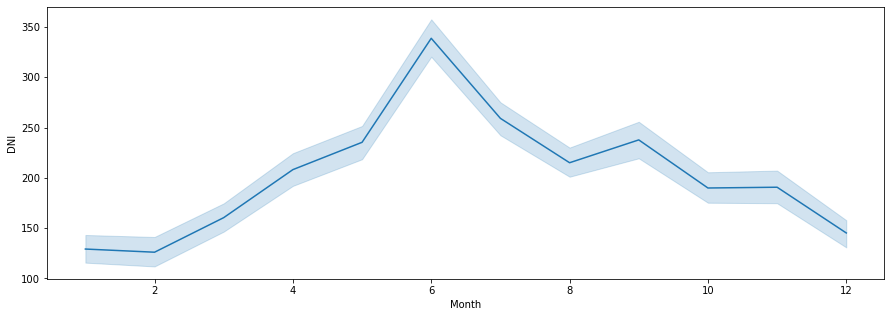

In [26]:
#df['Month'] = df.index.Month
#df['Day'] = df.index.Day
#df['Hour'] = df.index.Hour
#df['Minute'] = df.index.Minute
#figure(1)
plt.figure(figsize=(15, 5))

plt.ylabel("DNI")
#figure(1)
sns.lineplot(x = df.Month, y = 'DNI',data = df)

#figure(2)
#figsize=(30,20)

<AxesSubplot:xlabel='Month', ylabel='DHI'>

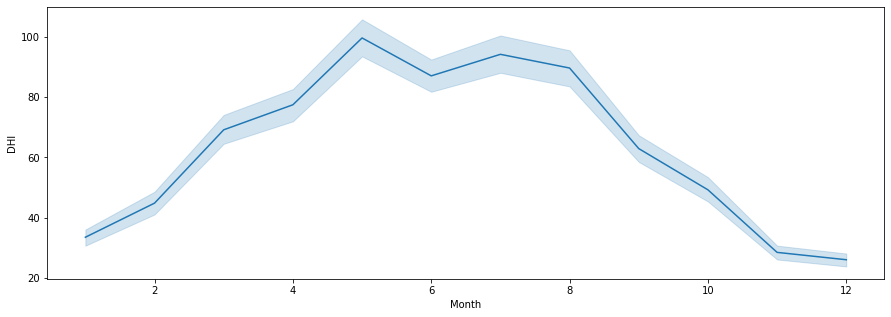

In [27]:
plt.figure(figsize=(15, 5))

plt.ylabel("DHI")
#figure(1)
sns.lineplot(x = df.Month, y = 'DHI',data = df)

In [94]:
train_size = int(len(df) * 0.65)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

11388 6132


In [128]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [105]:
time_steps = 1
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.GHI, time_steps)
X_test, y_test = create_dataset(test, test.GHI, time_steps)
print(X_train.shape, y_train.shape)

(11387, 1, 14) (11387,)


In [213]:
X.shape
Y.shape

(17520,)

In [109]:
y_pred = model.predict(X_test)